

```
# Importando Bibliotecas

```



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

iris_dataset = load_iris()

irisDF = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
irisDF


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Vendo se tem algum valor não preenchido


In [ ]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
irisDF["petal width (cm)"].value_counts(normalize = True)


5.0    0.066667
5.1    0.060000
6.3    0.060000
5.7    0.053333
6.7    0.053333
5.8    0.046667
5.5    0.046667
6.4    0.046667
4.9    0.040000
5.4    0.040000
6.1    0.040000
6.0    0.040000
5.6    0.040000
4.8    0.033333
6.5    0.033333
6.2    0.026667
7.7    0.026667
6.9    0.026667
4.6    0.026667
5.2    0.026667
5.9    0.020000
4.4    0.020000
7.2    0.020000
6.8    0.020000
6.6    0.013333
4.7    0.013333
7.6    0.006667
7.4    0.006667
7.3    0.006667
7.0    0.006667
7.1    0.006667
5.3    0.006667
4.3    0.006667
4.5    0.006667
7.9    0.006667
Name: sepal length (cm), dtype: float64

In [ ]:
irisDF["petal length (cm)"].value_counts(normalize = True)


1.4    0.086667
1.5    0.086667
5.1    0.053333
4.5    0.053333
1.6    0.046667
1.3    0.046667
5.6    0.040000
4.7    0.033333
4.9    0.033333
4.0    0.033333
4.2    0.026667
5.0    0.026667
4.4    0.026667
4.8    0.026667
1.7    0.026667
3.9    0.020000
4.6    0.020000
5.7    0.020000
4.1    0.020000
5.5    0.020000
6.1    0.020000
5.8    0.020000
3.3    0.013333
5.4    0.013333
6.7    0.013333
5.3    0.013333
5.9    0.013333
6.0    0.013333
1.2    0.013333
4.3    0.013333
1.9    0.013333
3.5    0.013333
5.2    0.013333
3.0    0.006667
1.1    0.006667
3.7    0.006667
3.8    0.006667
6.6    0.006667
6.3    0.006667
1.0    0.006667
6.9    0.006667
3.6    0.006667
6.4    0.006667
Name: petal length (cm), dtype: float64

In [ ]:
irisDF["sepal width (cm)"].value_counts(normalize = True)


3.0    0.173333
2.8    0.093333
3.2    0.086667
3.4    0.080000
3.1    0.073333
2.9    0.066667
2.7    0.060000
2.5    0.053333
3.5    0.040000
3.3    0.040000
3.8    0.040000
2.6    0.033333
2.3    0.026667
3.6    0.026667
3.7    0.020000
2.4    0.020000
2.2    0.020000
3.9    0.013333
4.4    0.006667
4.0    0.006667
4.1    0.006667
4.2    0.006667
2.0    0.006667
Name: sepal width (cm), dtype: float64

In [ ]:
irisDF["sepal length (cm)"].value_counts(normalize = True)

5.0    0.066667
5.1    0.060000
6.3    0.060000
5.7    0.053333
6.7    0.053333
5.8    0.046667
5.5    0.046667
6.4    0.046667
4.9    0.040000
5.4    0.040000
6.1    0.040000
6.0    0.040000
5.6    0.040000
4.8    0.033333
6.5    0.033333
6.2    0.026667
7.7    0.026667
6.9    0.026667
4.6    0.026667
5.2    0.026667
5.9    0.020000
4.4    0.020000
7.2    0.020000
6.8    0.020000
6.6    0.013333
4.7    0.013333
7.6    0.006667
7.4    0.006667
7.3    0.006667
7.0    0.006667
7.1    0.006667
5.3    0.006667
4.3    0.006667
4.5    0.006667
7.9    0.006667
Name: sepal length (cm), dtype: float64

In [ ]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**# Plotando o Gráfico Boxplot**

<Axes: >

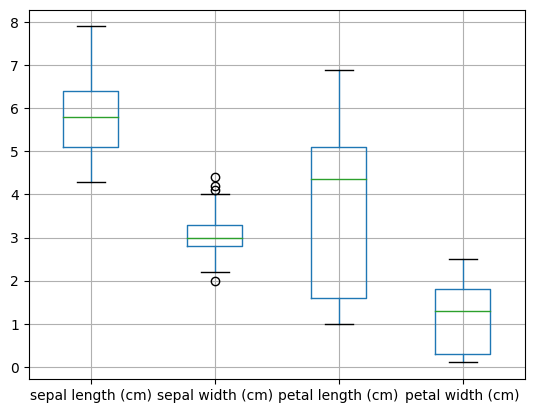

In [ ]:
irisDF.boxplot()